In [1]:
import numpy as np
import sympy as sp
from sympy import *
from sympy import Matrix
import matplotlib.pyplot as pyplot
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
from numpy import linalg
import cmath
%matplotlib inline
from mpl_toolkits import mplot3d
import time
#import numba
#from numba import jit

In [2]:
import nbimporter
import Functions_Honeycomb_Dirac as Fun_HD

Importing Jupyter notebook from Functions_Honeycomb_Dirac.ipynb


# Dirac model

In [3]:
dkx = 10**-3
dky = 10**-3

Delta = 0.05

DP_x = 0 
DP_y = 0 

kx_list = np.linspace(-np.pi/20,np.pi/20,100) 
ky = DP_y

E_list_0 = 1j*np.zeros(len(kx_list))
E_list_1 = 1j*np.zeros(len(kx_list))
F_list_0 = 1j*np.zeros(len(kx_list)) # "_0" indicates the fisrt energy level
F_list_1 = 1j*np.zeros(len(kx_list)) # "_1" indicates the second energy level

start = time.time()

i = 0
for kx in kx_list:
    E_list_0[i] = linalg.eigh(Fun_HD.H_Dirac(kx,ky,DP_x,DP_y,Delta))[0][0]
    E_list_1[i] = linalg.eigh(Fun_HD.H_Dirac(kx,ky,DP_x,DP_y,Delta))[0][1]
    F_list_0[i] = Fun_HD.F(Fun_HD.H_Dirac,0,kx,ky,dkx,dky,DP_x,DP_y,Delta)
    F_list_1[i] = Fun_HD.F(Fun_HD.H_Dirac,1,kx,ky,dkx,dky,DP_x,DP_y,Delta)
    i += 1
    
print("Execution time:",time.time()-start,"secondes")

Execution time: 0.08464336395263672 secondes


#### Spectrum in function of $k_x$ for $k_y = 0$

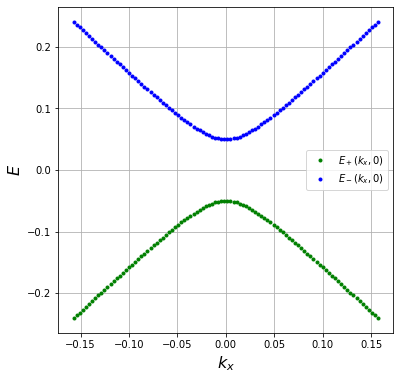

In [4]:
fig_E_Dirac = pyplot.figure(figsize=(6,6))
ax1 = pyplot.subplot(111)

ax1.plot(kx_list,E_list_0.real,'g.',label='$E_+(k_x,0)$')
ax1.plot(kx_list,E_list_1.real,'b.',label='$E_-(k_x,0)$') 
    
ax1.set_xlabel('$k_x$',Fontsize=16)
ax1.set_ylabel('$E$',Fontsize=16)
ax1.grid(axis='both')
ax1.legend();

In [5]:
fig_E_Dirac.savefig("spectrum_E_Dirac.png")

## Berry curvatures with FHS for each energy level in function of $k_x$ and $k_y = 0$ around Dirac point $(0,0)$.

#### Graphics of $F_n$ in function of $k_x$ for $k_y = 0$

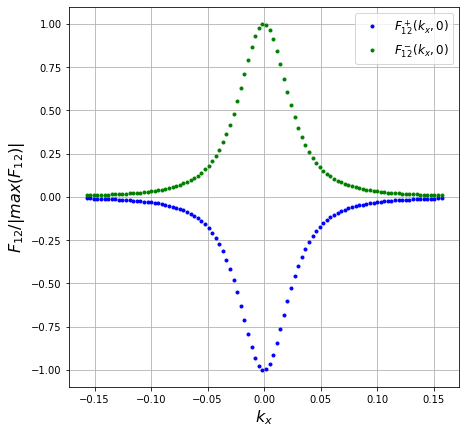

In [6]:
fig_curv_Dirac = pyplot.figure(figsize=(7,7))
ax1 = pyplot.subplot(111)

ax1.plot(kx_list,F_list_0.real/max(abs(F_list_0)),'.b',label='$ F_{12}^+(k_x,0)$')
ax1.plot(kx_list,F_list_1.real/max(abs(F_list_1)),'.g',label='$ F_{12}^-(k_x,0)$') 
    
ax1.set_xlabel('$k_x$',Fontsize=16)
ax1.set_ylabel('$F_{12}/|max(F_{12})|$',Fontsize=16)
ax1.grid(axis='both')
ax1.legend(fontsize = 'large');

In [7]:
fig_curv_Dirac.savefig("curv_Dirac.png")

## Comparison with the Niu formula for Berry curvatures for lower energy level

In [8]:
dkx = 10**-3
a = 1
DP_x = 0
DP_y = 0
Delta = 0.05
vF = 1.5
Omega_list = np.zeros(len(kx_list))
ky = DP_y

In [9]:
i = 0
for kx in kx_list:
    Omega_list[i] = Fun_HD.Omega(kx,ky,DP_x,DP_y,vF,Delta)
    i += 1

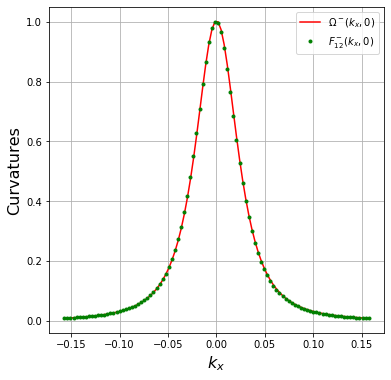

In [10]:
fig_curvanal_Dirac = pyplot.figure(figsize=(6,6))
ax1 = pyplot.subplot(111)

ax1.plot(kx_list,Omega_list/max(Omega_list),'-r',label='$\Omega^-(k_x,0)$')
ax1.plot(kx_list,F_list_1.real/max(abs(F_list_1)),'.g',label='$F_{12}^-(k_x,0)$')
    
ax1.set_xlabel('$k_x$',Fontsize=16)
ax1.set_ylabel('Curvatures',Fontsize=16)
ax1.grid(axis='both')
ax1.legend();

In [11]:
fig_curvanal_Dirac.savefig("comp_curv_Dirac.png")

# Honeycomb

For $\Delta = 1$

In [12]:
dkx = 0.5*10**-1
dky = 10**-2
a = 1
vF = 1.5
Delta = 1

kx_list = np.arange(-np.pi/a,np.pi/a,dkx)

ky_list = np.array([2*np.pi/3/np.sqrt(3)/a])
E_list_0 = 1j*np.zeros((len(kx_list),len(ky_list)))
E_list_1 = 1j*np.zeros((len(kx_list),len(ky_list)))
F_list_0 = 1j*np.zeros((len(kx_list),len(ky_list))) # "_0" indicates the fisrt energy level
F_list_1 = 1j*np.zeros((len(kx_list),len(ky_list))) # "_1" indicates the second energy level

start = time.time()

i = -1
j = 0
for kx in kx_list:
    i += 1
    j = 0
    for ky in ky_list:
        eigValues = linalg.eigh(Fun_HD.H_honeycomb(kx,ky,DP_x,DP_y,Delta))[0]
        E_list_0[i,j] = eigValues[0]
        E_list_1[i,j] = eigValues[1]
        F_list_0[i,j] = Fun_HD.F(Fun_HD.H_honeycomb,0,kx,ky,dkx,dky,DP_x,DP_y,Delta)
        F_list_1[i,j] = Fun_HD.F(Fun_HD.H_honeycomb,1,kx,ky,dkx,dky,DP_x,DP_y,Delta)
        j += 1
        
    
print("Execution time:",time.time()-start,"secondes")

Execution time: 0.2897915840148926 secondes


#### Graphics of $E_n$ in function of $k_x$ for $k_y = 0$

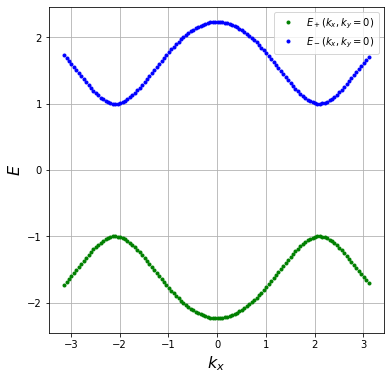

In [13]:
fig_E_HC1 = pyplot.figure(figsize=(6,6))
ax1 = pyplot.subplot(111)

ax1.plot(kx_list,E_list_0.real,'.g',label='$E_+(k_x,k_y = 0)$')
ax1.plot(kx_list,E_list_1.real,'.b',label='$E_-(k_x,k_y = 0)$') 
ax1.set_xlabel('$k_x$',Fontsize=16)
ax1.set_ylabel('$E$',Fontsize=16)
ax1.grid(axis='both')
ax1.legend();

In [14]:
fig_E_HC1.savefig("spectrum_E_HC1.png")

For $\Delta = 0$

In [15]:
dkx = 0.5*10**-1
dky = 10**-2
a = 1
vF = 1.5
Delta = 0

kx_list = np.arange(-np.pi/a,np.pi/a,dkx)

ky_list = np.array([2*np.pi/3/np.sqrt(3)/a])
E_list_0 = 1j*np.zeros((len(kx_list),len(ky_list)))
E_list_1 = 1j*np.zeros((len(kx_list),len(ky_list)))
F_list_0 = 1j*np.zeros((len(kx_list),len(ky_list))) # "_0" indicates the fisrt energy level
F_list_1 = 1j*np.zeros((len(kx_list),len(ky_list))) # "_1" indicates the second energy level

start = time.time()

i = -1
j = 0
for kx in kx_list:
    i += 1
    j = 0
    for ky in ky_list:
        eigValues = linalg.eigh(Fun_HD.H_honeycomb(kx,ky,DP_x,DP_y,Delta))[0]
        E_list_0[i,j] = eigValues[0]
        E_list_1[i,j] = eigValues[1]
        F_list_0[i,j] = Fun_HD.F(Fun_HD.H_honeycomb,0,kx,ky,dkx,dky,DP_x,DP_y,Delta)
        F_list_1[i,j] = Fun_HD.F(Fun_HD.H_honeycomb,1,kx,ky,dkx,dky,DP_x,DP_y,Delta)
        j += 1
        
    
print("Execution time:",time.time()-start,"secondes")

Execution time: 0.23229265213012695 secondes


#### Graphics of $E_n$ in function of $k_x$ for $k_y = 0$

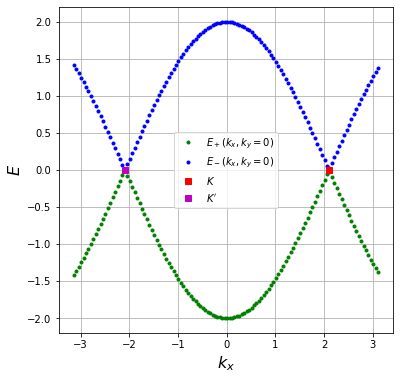

In [16]:
fig_E_HC2 = pyplot.figure(figsize=(6,6))
ax1 = pyplot.subplot(111)

ax1.plot(kx_list,E_list_0.real,'.g',label='$E_+(k_x,k_y = 0)$')
ax1.plot(kx_list,E_list_1.real,'.b',label='$E_-(k_x,k_y = 0)$') 
ax1.plot(2/3*np.pi,np.max(F_list_1.imag),'rs',label='$K$')   
ax1.plot(-2/3*np.pi,np.max(F_list_1.imag),'ms',label='$K\'$')
ax1.set_xlabel('$k_x$',Fontsize=16)
ax1.set_ylabel('$E$',Fontsize=16)
ax1.grid(axis='both')
ax1.legend();

In [17]:
fig_E_HC2.savefig("spectrum_E_HC2.png")

Let's compare the Berry curvature  of the Honeycomb with the Berry currvature of the Dirac model as an approximation.

In [25]:
dkx = 10**-3
dky = 10**-3
a = 1

DP_x = 2*np.pi/3/a
DP_y = 2*np.pi/3/np.sqrt(3)/a

kx_list = np.arange(DP_x-0.05,DP_x+0.05,dkx)
#ky_list = np.arange(-np.pi/a,np.pi/a,dky) # 1/np.sqrt(3)
ky_list = np.array([DP_y])
E_list_0 = 1j*np.zeros((len(kx_list),len(ky_list)))
E_list_1 = 1j*np.zeros((len(kx_list),len(ky_list)))
F_list_0 = 1j*np.zeros((len(kx_list),len(ky_list))) # "_0" indicates the fisrt energy level
F_list_1 = 1j*np.zeros((len(kx_list),len(ky_list))) # "_1" indicates the second energy level

Omega_list = np.zeros((len(kx_list),len(ky_list)))
Delta = 0.05
vF = 1.5

start = time.time()

i = -1
j = 0
for kx in kx_list:
    i += 1
    j = 0
    for ky in ky_list:
        #E_list_0[i,j] = linalg.eigh(H_honeycomb(kx,ky,Delta))[0][0]
        #E_list_1[i,j] = linalg.eigh(H_honeycomb(kx,ky,Delta))[0][1]
        F_list_0[i,j] = Fun_HD.F(Fun_HD.H_honeycomb,0,kx,ky,dkx,dky,DP_x,DP_y,Delta)
        F_list_1[i,j] = Fun_HD.F(Fun_HD.H_honeycomb,1,kx,ky,dkx,dky,DP_x,DP_y,Delta)
        Omega_list[i,j] = Fun_HD.Omega(kx,ky,DP_x,DP_y,vF,Delta)
        
        j += 1      
        
print("Execution time:",time.time()-start,"secondes")

Execution time: 0.17826175689697266 secondes


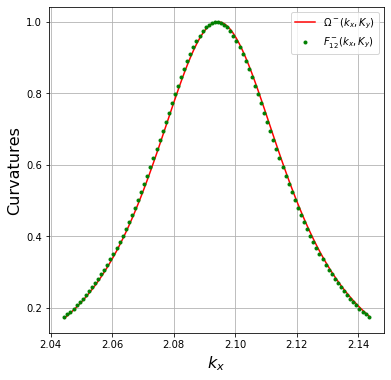

In [30]:
fig_curv_HC = pyplot.figure(figsize=(6,6))
ax1 = pyplot.subplot(111)

ax1.plot(kx_list,Omega_list/abs(np.max(Omega_list.real)),'-r',label='$\Omega^-(k_x,K_y)$')
ax1.plot(kx_list,F_list_1.real/abs(np.max(F_list_1.real)),'.g',label='$F_{12}^-(k_x,K_y)$')

    
ax1.set_xlabel('$k_x$',Fontsize=16)
ax1.set_ylabel('Curvatures',Fontsize=16)
ax1.grid(axis='both')
ax1.legend();

In [32]:
fig_curv_HC.savefig("curv_HC.png")